# 3DPOP Dataset- Data structure

In [4]:
DatasetDir = "" #directory to dataset

Here, we will describe the dataset structure provided in the 3DPOP dataset in detail, for manual operations and data manipulation. Do remember we provide a 3DPOP reader for basic data aquisition from the dataset, so please refer back to the readme.

Download the datset here:

## Overall File structure

The dataset is stored in seperate directories, with ```Markerless``` storing sequences without markers, and ```PigeonXX``` directories storing data for sequences for 1,2,5 and 10 pigeon individuals respectively.

**Dataset_3DPOP**

├── Markerless

├── MarkerlessMetadata.csv

├── Pigeon01

├── Pigeon02

├── Pigeon05

├── Pigeon10

└── Pop3DMetadata.csv


```Pop3DMetadata.csv``` and ```MarkerlessMetadata.csv``` provides meta data for each sequence in the dataset.

In [5]:
import pandas as pd
import os
pd.read_csv(os.path.join(DatasetDir, "Pop3DMetadata.csv")).head()


,Sequence,ViconTrial,SonyVideoName,IndividualNum,Date,Subjects
0,1,training_01072022_02,C0003,1,01072022,452_0107
1,2,training_01072022_03,C0004,2,01072022,452_0107;484_0107
2,3,training_01072022_04,C0005,1,01072022,391_0107
3,4,training_01072022_05,C0006,2,01072022,391_0107;473_0107
4,5,training_01072022_06,C0007,5,01072022,391_0107;473_0107;54_0107;452_0107;484_0107


**Sequence** specifies the sequence number, **IndividualNum** specifies the number of individuals in the sequence, and **Subjects** specify the unique subject IDs in each sequence, seperated by ";". Other columns are from the original data structure, so can be ignored!

## Sequence File Structure

Each sequence stores all required data and information is subdirectories. Here are all subdirectories present in each seqeunce, we will use sequence 1 as an example:

**Sequence1_n01_01072022**

├── Annotation

├── CalibrationInfo

├── POP3DAP_Data

├── Sequence1_n01_01072022-Cam1.mp4

├── TrainingSplit

└── Videos


- **Annotation:** Contains csvs of ground truth annotations for the sequence
- **Calibration Info:** Contains pickles of calibration parameters (Extrinsics + Intrinsics)
- **POP3DAP_Data:** Data files to run POP3D annotation pipeline, contains raw motion tracking data and object definitions.
- **TrainingSplit:** Subdirectory of videos and annotation csv as train/val/test split, in the ratio of 60/30/10. We recommend users to sample images from the corresponding data splits when training models.
- **Videos**: Raw videos syncrhonized between all 4 views, and undistorted using intrinsic parameters.
- **[SequenceName]-Cam1.mp4:** A sample video for users to visualize the sequence.

## Annotation File Structure

All annotations are provide in csv format. Here are the details for how all csvs are structured:

### 2D and 3D keypoint annotation

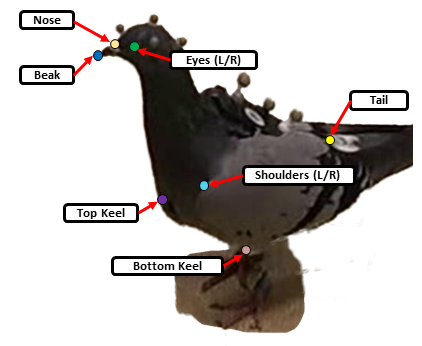

In [11]:
from IPython import display
display.Image("../Media/Keypoints.png")

Each column starts with the Bird ID (in this case, **452_0107**, followed by the rigid body object the point belongs to (bp: backpack or hd: head), then the keypoint name (beak, nose, leftEye, rightEye, leftShoulder, rightShoulder, topKeel, bottomKeel, tail) and finally the coordinate (x,y,z).

If the object name is followed by a number (e.g bp1, bp2, bp3...), these are the coordinates for motion tracking markers attached to the head and backpack of each pigeon.

In [9]:
#Keypoint sample:
pd.read_csv(os.path.join(DatasetDir, "Pigeon01","Sequence1_n01_01072022","Annotation","Sequence1_n01_01072022-Cam1-Keypoint2D.csv" )).head()

,Unnamed: 0,frame,452_0107_bp1_x,452_0107_bp1_y,452_0107_bp2_x,452_0107_bp2_y,452_0107_bp3_x,452_0107_bp3_y,452_0107_bp4_x,452_0107_bp4_y,...,452_0107_hd4_x,452_0107_hd4_y,452_0107_hd_beak_x,452_0107_hd_beak_y,452_0107_hd_nose_x,452_0107_hd_nose_y,452_0107_hd_leftEye_x,452_0107_hd_leftEye_y,452_0107_hd_rightEye_x,452_0107_hd_rightEye_y
0,0,0,NaN,NaN,3044.443604,5.082176,NaN,NaN,3045.978760,7.307683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,3042.823975,7.068341,NaN,NaN,3044.427002,9.242372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,NaN,NaN,3040.582764,7.779658,NaN,NaN,3042.304443,9.610321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,NaN,NaN,3038.882812,7.366797,NaN,NaN,3040.360107,9.067238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,NaN,NaN,3037.311279,7.114006,NaN,NaN,3038.584717,8.628550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Bounding box annotation

Bounding box annotation has the same naming convention as the keypoint annotaitons, but instead of x,y,z, the bounding box csvs have x,y,w,h as the final extension. **(x,y)** specifies the coordinates of the top left corner of the bounding box on the 2D image, **w** and **h** specifies the width and height of each bounding box

In [12]:
#BBox sample:
pd.read_csv(os.path.join(DatasetDir, "Pigeon01","Sequence1_n01_01072022","Annotation","Sequence1_n01_01072022-Cam1-BBox.csv" )).head()

,Unnamed: 0,frame,452_0107_BBox_x,452_0107_BBox_y,452_0107_BBox_w,452_0107_BBox_h
0,0,0,2947.369385,0.0,163.303955,109.641212
1,1,1,2945.640137,0.0,162.939209,111.278194
2,2,2,2943.243164,0.0,163.144043,111.676327
3,3,3,2941.806152,0.0,162.174316,111.141766
4,4,4,2940.457031,0.0,161.545898,110.862076


## Calibration Information

Fianlly, we describe the data structure for the calibration information. Each camera in each sequence has a pickle for extrinsic and intrinsics. All parameters were obtained from the opencv library, please refer to the opencv documentation for details.

### Intrinsics 

The intrinsics pickle stores 2 arrays, a 3x3 camera calibration matrix and a 5x1 distortion coefficient matrix.

In [16]:
import pickle as p
cameraMatrix, distCoeffs= p.load(open(os.path.join(DatasetDir,"Pigeon01","Sequence1_n01_01072022","CalibrationInfo","Sequence1_n01_01072022-Cam1-Intrinsics.p"),"rb"))
print(cameraMatrix)
print(distCoeffs)

[[2.59508672e+03 0.00000000e+00 1.88880841e+03]
 [0.00000000e+00 2.58421916e+03 1.07006769e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 0.03526348 -0.06382786 -0.0028523  -0.00257857  0.05049459]]


### Extrinsics

The extrinsics pickle stores the 3x1 rotation matrix and 3x1 translation matrix to tranform points from the world coordinate system to the camera coordinate system. The 3x1 rotation matrix can be converted to a 3x3 rotation matrix using the opencv function ```cv2.Rodrigues```

In [18]:
rvec, tvec= p.load(open(os.path.join(DatasetDir,"Pigeon01","Sequence1_n01_01072022","CalibrationInfo","Sequence1_n01_01072022-Cam1-Extrinsics.p"),"rb"))
print(rvec)
print(tvec)

[[ 2.07925862]
 [ 0.62658516]
 [-0.37314189]]
[[-112.5282086 ]
 [-392.20386751]
 [3475.90338056]]


## Contact

This is all! If you have any questions on data loading or accessing the dataset, please dont hestiate to contact Alex Chan: 

Email: hoi-hang.chan [at] uni-konstanz.de

